In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [213]:
image=cv2.imread(r'C:\Users\student\Desktop\CV20\Lenna.png')

In [214]:
image.shape

(512, 512, 3)

In [215]:
image.size

786432

#Using Library

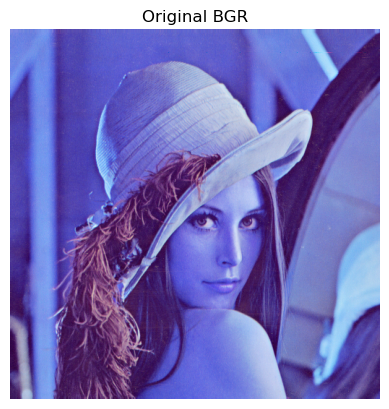

In [216]:
plt.imshow(image)
plt.axis('off')
plt.title('Original BGR')
plt.show()

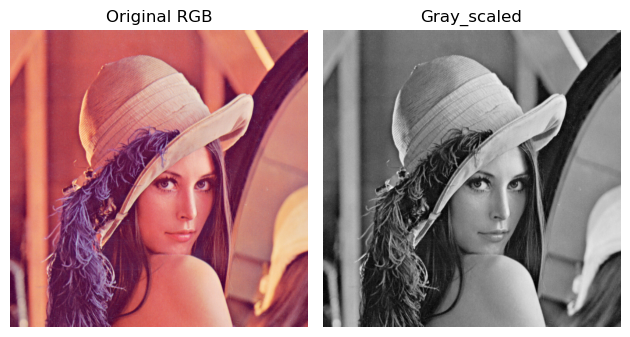

In [217]:
image_2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(image_2)
plt.axis('off')
plt.title('Original RGB')

gray=cv2.cvtColor(image_2,cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.title('Gray_scaled')
plt.tight_layout()  
plt.show()


In [218]:
equ_image=cv2.equalizeHist(gray)

#Histogram_equalization

Text(0, 0.5, 'Frequency')

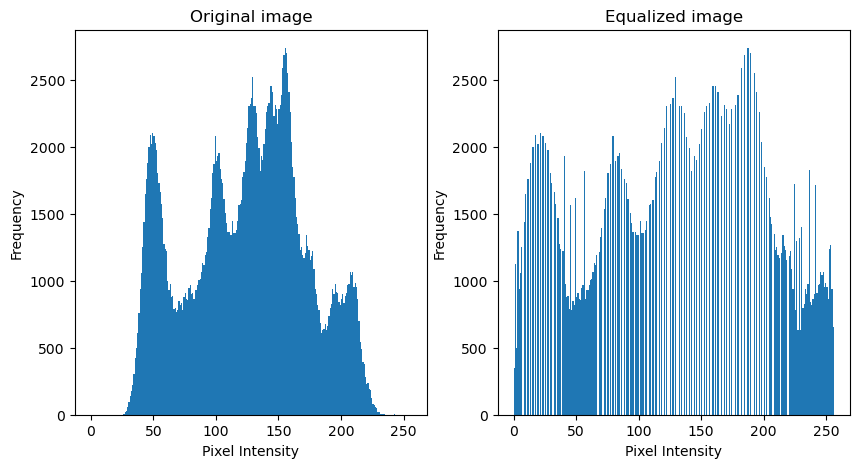

In [219]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(gray.ravel(),bins=256,range=(0,256))
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(equ_image.ravel(),bins=256,range=(0,256))
plt.title('Equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

#Resizing

(-0.5, 1079.5, 1609.5, -0.5)

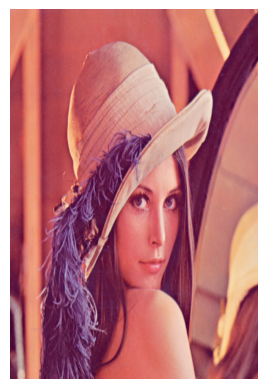

In [220]:
resized_image=cv2.resize(image_2,(1080,1610))

plt.imshow(resized_image)
plt.axis('off')

In [221]:
resized_image.shape

(1610, 1080, 3)

#using manual

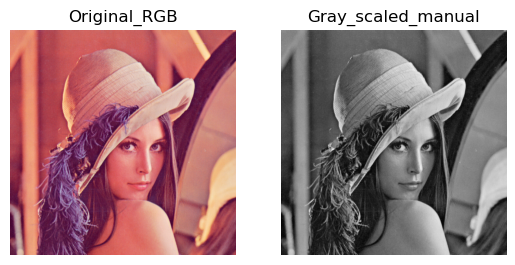

In [222]:
plt.subplot(1,2,1)
plt.imshow(image_2)
plt.axis('off')
plt.title('Original_RGB')

gray_2=0.299*image_2[:,:,2]+0.587*image_2[:,:,1]+0.114*image_2[:,:,0]
gray_2=np.uint8(gray_2)
plt.subplot(1,2,2)
plt.imshow(gray_2,cmap='gray')
plt.axis('off')
plt.title('Gray_scaled_manual')
plt.show()

In [223]:
hist,bin=np.histogram(gray_2.flatten(),256,[0,256])

cdf=hist.cumsum()

cdf_normalized=cdf*float(255)/cdf[-1]

equalized_image_2=np.interp(gray_2.flatten(),bin[:-1],cdf_normalized)

Text(0, 0.5, 'Frequency')

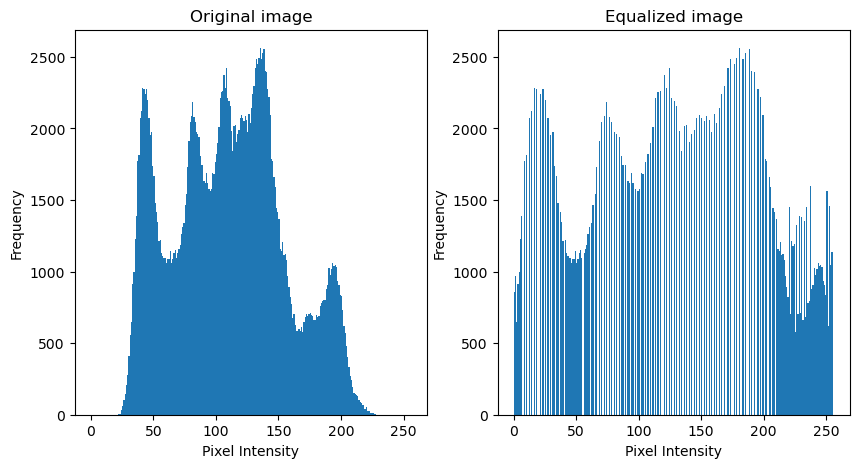

In [224]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(gray_2.ravel(),bins=256,range=(0,256))
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(equalized_image_2.ravel(),bins=256,range=(0,256))
plt.title('Equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

#reisizing

In [231]:
new_height=1610
new_width=1080

height,width,channels=image_2.shape

In [232]:
x_scale=new_width/width
y_scale=new_height/height

In [233]:
resized_image_2=np.zeros((new_height,new_width,channels),dtype=np.uint8)
resized_image_2.shape

(1610, 1080, 3)

In [236]:
for i in range(new_height):
    for j in range(new_width):
        ori_x=int(j/x_scale)
        ori_y=int(i/y_scale)
        resized_image_2[i,j]=image_2[ori_y,ori_x]

(-0.5, 1079.5, 1609.5, -0.5)

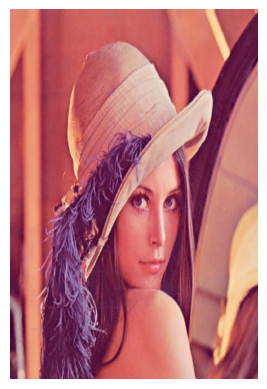

In [237]:
plt.imshow(resized_image_2)
plt.axis('off')